In [1]:
# check number of events with csc/dt clusters
import ROOT as rt
# import root_numpy as rtnp
import csv
import re
import sys
import collections
import os

from collections import OrderedDict
import uproot
import pandas as pd

import scipy
import awkward
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
sys.path.append('/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/lib/')
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot
from helper_functions import deltaR, deltaPhi

import CMS_lumi, tdrstyle
a = tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 0

wH = 1
Z_MASS = 91.2


# donotdelete = []
print(sys.version)

Welcome to JupyROOT 6.18/02
3.6.8 (default, Aug  7 2019, 17:28:10) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


# Load ntuples

In [2]:
fpath_bkg =OrderedDict()
tree_bkg = OrderedDict()
tree_sig = OrderedDict()
fpath_sig =OrderedDict()


start_t = time.time()



isData = 1
if isData:
    ntupler_version = 'V1p17/'

    analyzer_version = "/v5/v162/"


# #     data_path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/'+ntupler_version+'/Data2018/'+analyzer_version+'/normalized/'
#     data_path = '/storage/af/user/christiw/login-1/christiw/LLP/displacedJetMuonAnalyzer/csc/'+ntupler_version+'/Data2018/'+analyzer_version+'/normalized/'
    data_path = '/storage/af/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/'+ntupler_version+'/Data2018/'+analyzer_version+'/normalized/'

    fpath_bkg['data'] = data_path + 'Run2_displacedJetMuonNtupler_V1p17_Data2016_Data2017_Data2018-HighMET_goodLumi.root'
#     fpath_bkg['data18'] = data_path + 'Run2_displacedJetMuonNtupler_V1p17_Data2018_17Sept2018_Run2018-HighMET-17Sep2018_goodLumi.root'
#     data_path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/'+ntupler_version+'/Data2017/'+analyzer_version+'/normalized/'
#     fpath_bkg['data17'] = data_path + 'Run2_displacedJetMuonNtupler_V1p17_Data2017_Run2017-HighMET-17Nov2017_goodLumi.root'
#     data_path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/'+ntupler_version+'/Data2016/'+analyzer_version+'/normalized/'
#     fpath_bkg['data16'] = data_path + 'Run2_displacedJetMuonNtupler_V1p17_Data2016_Run2016-HighMET-07Aug17_goodLumi.root'

#     fpath_bkg['data'] = '/storage/af/user/christiw/login-1/christiw/LLP/displacedJetMuonAnalyzer/csc/V1p17//Data2018//v5/v127//normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_Data2017_Data2018-HighMET_goodLumi.root'


#     fpath_bkg['data17'] = '/storage/af/user/christiw/login-1/christiw/LLP/displacedJetMuonAnalyzer/csc/V1p17//Data2017//v5/v127//normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_Run2017-HighMET-17Nov2017_goodLumi.root'


else:
#     decay = '4Tau'
#     masses = ['7', '15', '40', '55']
#     if decay == 'bbbb': masses = ['15','40','55']
    
#     lumi = [ 35920, 41530, 59740 ]
#     years = ['MC_Summer16', 'MC_Fall17', 'MC_Fall18']
#     tune = ['TuneCUETP8M1_13TeV-powheg-pythia8','TuneCP5_13TeV-powheg-pythia8','TuneCP5_13TeV-powheg-pythia8']
# #     ctaus  = ['100','1000','10000','100000']
#     ctaus = ['1000']
#     year_index = 3
    
    
#     old_ctau = {
#     'STodd_ms3p0':[100,500],
#     'SToEE_ms0p4':[10,50],
#     'SToGammaGamma_ms0p4':[10,50],

#     'SToKPlusKMinus_ms1p5':[38,187],
#     'SToK0K0_ms1p5':[38,187],
#     'SToPi0Pi0_ms0p4':[10,50],
#     'SToPi0Pi0_ms1p0':[25,125],
#     'SToPiPlusPiMinus_ms0p4':[10,50],
#     'SToPiPlusPiMinus_ms1p0':[25,125],
#     'STodd_ms7':[100, 1000, 10000, 100000],
#     'STodd_ms15':[100, 1000, 10000, 100000],
#     'STodd_ms40':[100, 1000, 10000, 100000],
#     'STodd_ms55':[100, 1000, 10000, 100000],
#     'SToTauTau_ms7':[100, 1000, 10000, 100000],
#     'SToTauTau_ms15':[100, 1000, 10000, 100000],
#     'SToTauTau_ms40':[100, 1000, 10000, 100000],
#     'SToTauTau_ms55':[100, 1000, 10000, 100000],
#     'SToBB_ms15':[100, 1000, 10000, 100000],
#     'SToBB_ms40':[100, 1000, 10000, 100000],
#     'SToBB_ms55':[100, 1000, 10000, 100000],
    
#     }
    
    old_ctau = {
#     'STodd_ms3p0':[100],
#     'SToEE_ms0p4':[10],
#     'SToGammaGamma_ms0p4':[10],

#     'SToKPlusKMinus_ms1p5':[187],
#     'SToK0K0_ms1p5':[187],
#     'SToPi0Pi0_ms0p4':[10],
#     'SToPi0Pi0_ms1p0':[125],
#     'SToPiPlusPiMinus_ms0p4':[10],
#     'SToPiPlusPiMinus_ms1p0':[125],
    'STodd_ms7':[1000],
    'STodd_ms15':[1000],
    'STodd_ms40':[1000],
    'STodd_ms55':[1000],
    'SToTauTau_ms7':[1000],
    'SToTauTau_ms15':[1000],
    'SToTauTau_ms40':[1000],
    'SToTauTau_ms55':[1000],
    'SToBB_ms15':[1000],
    'SToBB_ms40':[1000],
    'SToBB_ms55':[1000],
    
    }

#     for mass in sample.keys():
#         for ct in sample[mass]:
        
#             if year_index == 3:
#                 mc_path = '/storage/af/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/'+ntupler_version+'/MC_all/'+analyzer_version+'/normalized/'
#                 fpath_bkg['m'+mass+'ctau'+ct] = mc_path + 'ggH_HToSSTo'+decay+'_MH-125_MS-'+str(mass)+'_ctau-'+ct+'_137000pb_weighted.root'
#             else:
#                 mc_path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/'+ntupler_version+'/'+years[year_index]+'/'+analyzer_version+'/normalized/'
#                 fpath_bkg['m'+mass+'ctau'+ct] = mc_path + 'ggH_HToSSTo'+decay+'_MH-125_MS-'+str(mass)+'_ctau-'+ct+'_'+tune[year_index]+'_'+str(lumi[year_index])+'pb_weighted.root'


        
    ntupler_version = 'V1p17/'
    mc_path = {}
    analyzer_version = 'v1/v162/'
    mc_central_path = '/storage/af/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/'+ntupler_version+'/MC_all/'+analyzer_version+'/normalized/'
    analyzer_version = 'v2/v162/'
    mc_private_path = '/storage/af/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/'+ntupler_version+'/MC_Fall18/'+analyzer_version+'/normalized/'


    for k in old_ctau.keys():
        for ct in old_ctau[k]:

            key = 'MC_ggH_'+k + '_'+str(ct)
            if 'ms7' in k or 'ms15' in k or 'ms40' in k or 'ms55' in k:
                mass = k[k.find('ms')+2:]
                if 'dd' in k:fpath_bkg[key] = mc_central_path+'ggH_HToSSTodddd_MH-125_MS-'+mass+'_ctau-'+str(ct)+'_137000pb_weighted.root'
                elif 'BB' in k:fpath_bkg[key] = mc_central_path+'ggH_HToSSTobbbb_MH-125_MS-'+mass+'_ctau-'+str(ct)+'_137000pb_weighted.root'
                else:fpath_bkg[key] = mc_central_path+'ggH_HToSSTo4Tau_MH-125_MS-'+mass+'_ctau-'+str(ct)+'_137000pb_weighted.root'
            else:
                fpath_bkg[key] = mc_private_path+'ggH_HToSS_'+k+'_pl'+str(ct)+'_137000pb_weighted.root'
            if not os.path.exists(fpath_bkg[key]):print(key, fpath_bkg[key])
            

            
                
                
NEvents = {}
Total = {}
accep = {}
accep_met = {}
for k,v in fpath_bkg.items():
    print (k, v)
    root_dir = uproot.open(v) 
    tree_bkg[k] = root_dir['MuonSystem']
    NEvents[k] = root_dir['NEvents'][1]
    if not isData:
#         Total[k] = root_dir['Total'][1]
#         Total[k] = root_dir['Total'][1]


        accep[k] = root_dir['acceptance'][1]
        accep_met[k] = root_dir['acceptance_met'][1]
#     else:
#         Nmet200 = root_dir['Nmet200'][1]
#         NmetFilter = root_dir['NmetFilter'][1]
#         Nlep0 = root_dir['Nlep0'][1]
#         Njet1 = root_dir['Njet1'][1]
#         NcosmicVeto = root_dir['NcosmicVeto'][1]
    a = tree_bkg[k]["weight"].array()
    print("NEvents",NEvents[k],len(a))


data /storage/af/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17//Data2018//v5/v162//normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_Data2017_Data2018-HighMET_goodLumi.root
NEvents 22763250.0 14129474


In [12]:

nCscRechitClusters = {}
nDtRechitClusters = {}
sel_ev = {}
addNoiseFlag = 1
cluster_index = ''
for k in list(tree_bkg.keys()):
    if not 'data' in k:continue
########### SELECTION: CLUSTERS ############
    if 'data' in k: T = tree_bkg['data']
    else: T = tree_bkg[k]

    sel_csccluster = T.array('cscRechitCluster' + cluster_index + 'TimeSpreadWeightedAll')<20
    sel_csccluster = np.logical_and(sel_csccluster, np.abs(T.array('cscRechitCluster' + cluster_index + 'MetEENoise_dPhi'))<1.2)
    sel_csccluster = np.logical_and(sel_csccluster, T.array('cscRechitCluster' + cluster_index + 'JetVetoPt')<30)
    sel_csccluster = np.logical_and(sel_csccluster, T.array('cscRechitCluster' + cluster_index + 'Me11Ratio')<1)
    sel_csccluster = np.logical_and(sel_csccluster, np.logical_not(np.logical_and(T.array('cscRechitClusterMuonVetoPt') >= 30, T.array('cscRechitClusterMuonVetoGlobal'))))

    if 'data' in k: 
        sel_csccluster = np.logical_and(sel_csccluster, np.logical_and(T.array('cscRechitCluster' + cluster_index + 'TimeWeighted')< 12.5, \
                                                                         T.array('cscRechitCluster' + cluster_index + 'TimeWeighted') > -5))
    else: 
        sel_csccluster = np.logical_and(sel_csccluster, np.logical_and(T.array('cscRechitCluster' + cluster_index + 'TimeWeighted')+0.66 < 12.5, \
                                                                         T.array('cscRechitCluster' + cluster_index + 'TimeWeighted')+0.66 > -5))
        
    sel_dtcluster = np.abs(T.array('dtRechitClusterMetEENoise_dPhi')) < 1
    sel_dtcluster = np.logical_and(sel_dtcluster, np.logical_not(np.logical_and(T.array('dtRechitClusterMuonVetoPt') >= 10, T.array('dtRechitClusterMuonVetoLooseId'))))
    sel_dtcluster = np.logical_and(sel_dtcluster, np.abs(T.array('dtRechitClusterJetVetoPt')) < 50)
    sel_dtcluster = np.logical_and(sel_dtcluster, np.logical_not(np.logical_and(T.array('dtRechitClusterMaxStation')==1, T.array('dtRechitClusterMaxStationRatio')>0.9)))
    
    
    cut = 5
    station = (T.array('dtRechitClusterNSegmentStation1')>cut).astype(int)+(T.array('dtRechitClusterNSegmentStation2')>cut).astype(int)\
+(T.array('dtRechitClusterNSegmentStation3')>cut).astype(int)+(T.array('dtRechitClusterNSegmentStation4')>cut).astype(int)

    max_station = np.maximum(np.maximum(np.maximum(T.array('dtRechitClusterNSegmentStation1'), T.array('dtRechitClusterNSegmentStation2')), T.array('dtRechitClusterNSegmentStation3')), T.array('dtRechitClusterNSegmentStation4'))
    min_station = np.minimum(np.minimum(np.minimum(T.array('dtRechitClusterNSegmentStation1'), T.array('dtRechitClusterNSegmentStation2')), T.array('dtRechitClusterNSegmentStation3')), T.array('dtRechitClusterNSegmentStation4'))

    sel_dtcluster = np.logical_and(sel_dtcluster, np.logical_or(station<4, min_station/max_station<0.4)) #remove if both clusters are 4 stations
    if addNoiseFlag and not 'data' in k: 
        sel_dtcluster = np.logical_and(sel_dtcluster, (T.array('dtRechitClusterSize')+T.array('dtRechitClusterNoiseHit')) >= 50)
    else: sel_dtcluster = np.logical_and(sel_dtcluster, T.array('dtRechitClusterSize') >= 50)




    ###################### cosmic muon veto #############
    sel_cosmic = np.logical_and(T.array('dtRechitClusterNOppositeSegStation1')>0, T.array('dtRechitClusterNOppositeSegStation2')>0)
    sel_cosmic = np.logical_and(sel_cosmic, T.array('dtRechitClusterNOppositeSegStation3')>0)
    sel_cosmic = np.logical_and(sel_cosmic, T.array('dtRechitClusterNOppositeSegStation4')>0)
    sel_cosmic = np.logical_and(sel_cosmic, T.array('dtRechitClusterNOppositeSegStation1')+T.array('dtRechitClusterNOppositeSegStation2')+\
                               T.array('dtRechitClusterNOppositeSegStation3')+T.array('dtRechitClusterNOppositeSegStation4')>=6)
    nstation = (T.array('dtRechitClusterNSegmentStation1')>1).astype(int)+(T.array('dtRechitClusterNSegmentStation2')>1).astype(int)\
    +(T.array('dtRechitClusterNSegmentStation3')>1).astype(int)+(T.array('dtRechitClusterNSegmentStation4')>1).astype(int)
    
    sel_dtcluster = np.logical_and(sel_dtcluster, np.logical_not(np.logical_and(nstation>=3, sel_cosmic)))
    
########### SELECTION: JETS ############
    
    sel_jet = np.logical_and(T.array('jetPt') > 30, np.abs(T.array('jetEta')) < 2.4 )
    sel_jet = np.logical_and(T.array('jetTightPassId'), sel_jet)


            
########### SELECTION: NOISE IN DT ############
    
    spike = np.logical_and( T.array('nDTRechitsSector')[:,0,0,7]>50,  T.array('nDTRechitsSector')[:,0,0,7]+T.array('nDTRechitsSector')[:,0,0,8]+T.array('nDTRechitsSector')[:,0,0,9]>120)
    spike = np.logical_and(spike, T.array('nDTRechitsSector')[:,0,0,8]>25)
    spike = np.logical_and(spike, T.array('nDTRechitsSector')[:,0,0,9]>10)

    
    
########### SELECTION: EVENTS ############

    sel_ev[k] = T.array('METNoMuTrigger')
    sel_ev[k] = np.logical_and(sel_ev[k] ,T.array('metEENoise') >= 200)
    sel_ev[k] = np.logical_and(sel_ev[k] , sel_jet.sum()>=1)
    sel_ev[k] = np.logical_and(sel_ev[k], (T.array('nDtRings')+T.array('nCscRings'))<10)
    sel_ev[k] = np.logical_and(sel_ev[k],T.array('Flag2_all'))
    sel_ev[k] = np.logical_and(sel_ev[k] , np.logical_not(spike))

########### BRANCHES ############
    nCscRechitClusters[k] = T.array('nCscRechitClusters')[sel_ev[k]]
    nDtRechitClusters[k] = T.array('nDtRechitClusters')[sel_ev[k]]

                     

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


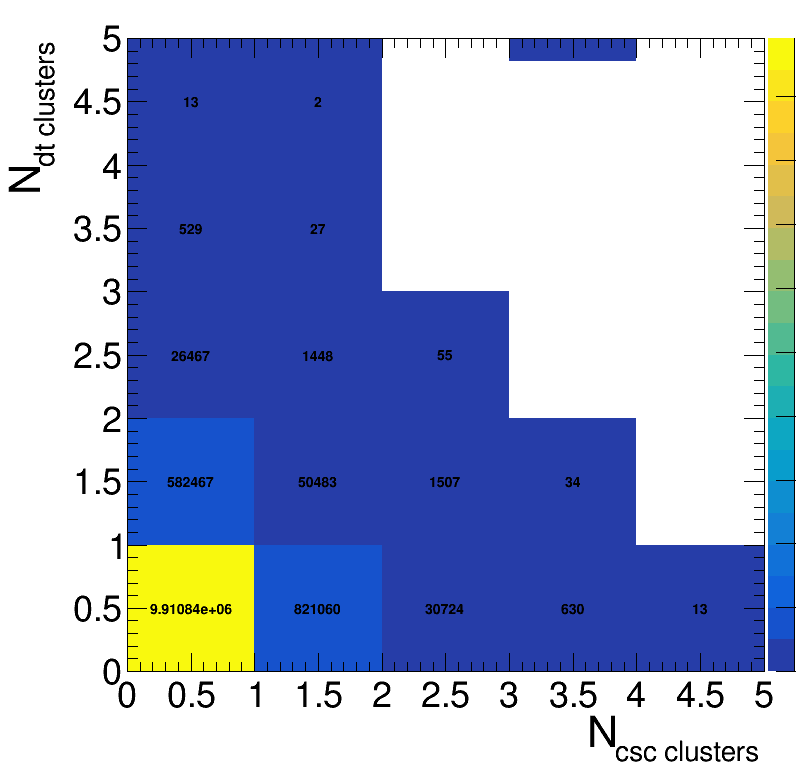

In [20]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.6,0.7,0.80,0.92)

#     leg = rt.TLegend(0.5,0.56,0.75,0.92)

leg.SetTextSize(0.03)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
h = {}


h[k] = create_TH2D(np.column_stack((nCscRechitClusters[k],nDtRechitClusters[k])), \
                   axis_title = ['N_{csc clusters}','N_{dt clusters}', 'Fraction of events'], binning = [5,0,5,5,0,5])


h[k].Draw('colz text')
leg.Draw()
c.SetRightMargin(0.04)

c.Draw()


In [21]:
26469+529+13

27011